Not that kind of MVP. That's definitely a source of confusion for me.

Having had a basic look at the batting stats, there are clear time series trends for a number of them, a few monotonic and several with some degree of oscillating behavior.

Every data point in this workbook is an average across all of major league baseball for a given year from 1901-2019.

This workbook is scattered, but it's already Wednesday anyway and I need to wrap up. I'm not as far through data visualization as I want to be, given the huge mountains of it there are. I will do some more pairplots on subgroups of speed, pitching, and fielding data, and pick a few "flagship" stats from each of the five domains of 1) power hitting, 2) pitching, 3) speed / small ball, 4) fielding, and 5) attendance and TV ratings to regress against each other.

My MVP goal is to be able to find small bundles of these flagship stats that form a predictive model for attendance and answer the question, "If MLB chose to intervene and change the style of the game to enhance attendance, what direction should they seek to go?"

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
with open('batting_data.pkl', 'rb') as cellar:
    bat_dict = pickle.load(cellar)
with open('bat_rate_data.pkl', 'rb') as cellar:
    bat_rate_df = pickle.load(cellar)

One insight is to clarify how much certain stats map to certain styles of play: pitching-dominant, heavy hitters, speed / small ball. Before starting, I thought doubles were largely about speed. However, the data shows something else.

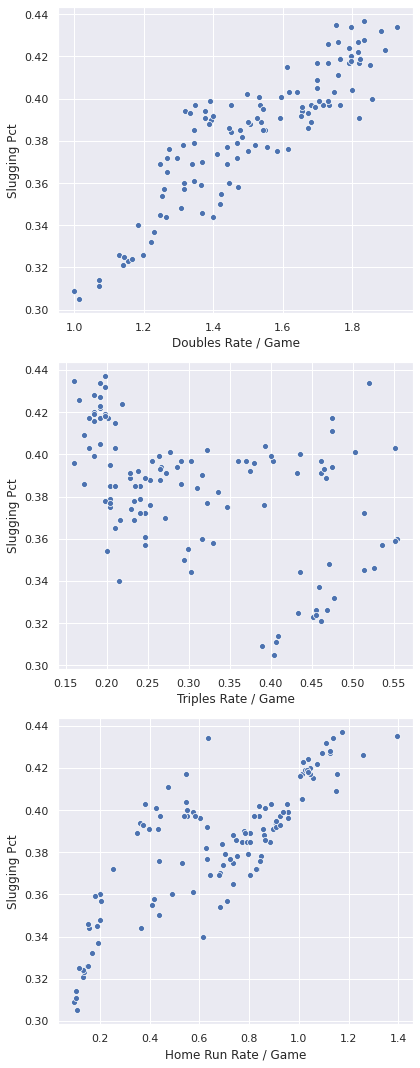

In [12]:
plt.figure(figsize=(6,15))
plt.subplot(3,1,1)
plt.xlabel('Doubles Rate / Game')
plt.ylabel('Slugging Pct')
sns.scatterplot(x=np.array(bat_rate_df['2B/G']),y=np.array(bat_rate_df['SLG']))
plt.subplot(3,1,2)
plt.xlabel('Triples Rate / Game')
plt.ylabel('Slugging Pct')
sns.scatterplot(x=np.array(bat_rate_df['3B/G']),y=np.array(bat_rate_df['SLG']))
plt.subplot(3,1,3)
plt.xlabel('Home Run Rate / Game')
plt.ylabel('Slugging Pct')
sns.scatterplot(x=np.array(bat_rate_df['HR/G']),y=np.array(bat_rate_df['SLG']))
plt.tight_layout()

Both doubles and home runs have a broad positive relationship to slugging rate, although it's not a simple linear dependence, especially for home runs.

Triples have a really complex relationship with slugging. Obviously triples are "good"--they count for three bases toward the slugging percentage--but guys who hit triples have basically hit a double and then run really fast and wound up at third. They generally aren't heavy hitters overall (broad negative correlation between triples and home runs not shown). That's what I expected.

I actually expected doubles to behave more like triples than like home runs. I definitely didn't expect them to have a closer linear fit to slugging percentage than home runs.

When I go to check correlations across domains, triples might be a banner-bearer for speed (stolen bases are even more classic), but doubles definitely won't be.

I've also done a tiny bit of exploration of periodicity.

This code worked over from
https://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html...
I dropped most of it, actually.

In [13]:
from scipy import arange
def plotSpectrum(y):
    """
    Plots a single-sided amplitude spectrum of y(t).
    """
    Y = np.abs(np.fft.rfft(y)) # fft computation, real part

    sns.scatterplot(x=arange(len(Y)),y=Y) # plotting the spectrum
    plt.xlim(1,20)
    plt.ylim(0,3)
    # ax.set_ylim((0.0,0.02))
    plt.xlabel('Wavenumber')
    plt.ylabel('Amplitude')

In [14]:
bat_df = bat_dict['LgAvg']
bat_df.head(3)

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
1901,23,28.1,4.99,139,5317,4819,692,1310,183,77,...,.360,.686,94,1733,,52,105,,,
1902,24,28.3,4.43,140,5267,4768,619,1272,177,61,...,.344,.665,94,1638,,45,115,,,
1903,23,28.4,4.44,139,5222,4715,618,1236,190,73,...,.346,.664,94,1634,,46,126,,,


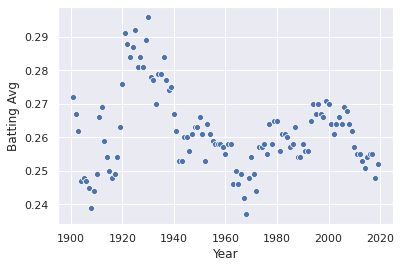

In [16]:
bat_df['Year']=bat_df.index.astype(int)
bat_df = bat_df.replace(to_replace='',value=np.nan)
bat_df = bat_df.astype(float)
bat_avg = np.array(bat_df['BA'])
year = np.array(bat_df['Year'])
plt.xlabel('Year')
plt.ylabel('Batting Avg')
sns.scatterplot(x=year,y=bat_avg)

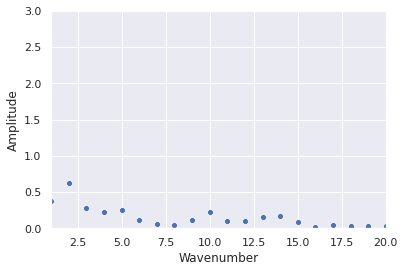

In [17]:
plotSpectrum(bat_avg)

It's ugly, as it had to be, and I need some more time to learn how any of this works in Python libraries, but there are a few peaks in this spectrum at 2 and 10 for sure, 5 and 13-14 as well.